In [1]:
#import libraries
from PIL import Image, ImageDraw, ImageFont
import random
import matplotlib.pyplot as plt

In [2]:
# Set the size of the image
img_size = (20, 20)

In [3]:
# Prepare a function to create a handwritten-style number
def create_handwritten_digit(digit):
    # Create a blank image with white background
    img = Image.new('L', img_size, color=255)
    draw = ImageDraw.Draw(img)

    # Use a basic font
    font_size = random.randint(14, 18)  # Randomize font size
    font = ImageFont.load_default()

    # Randomize position a bit to make it look hand-written
    position = (random.randint(0, 5), random.randint(-3, 3))

    # Draw the digit
    draw.text(position, str(digit), fill=0, font=font)

    return img

In [4]:
# Create 10 different images for each digit
handwritten_digits = {digit: [create_handwritten_digit(digit) for _ in range(10)] for digit in range(10)}

In [5]:
# Function to create a test image of a handwritten digit
def create_test_handwritten_digit():
    # Randomly select a digit
    digit = random.randint(0, 9)

    # Reusing the same function for creating a digit image
    return create_handwritten_digit(digit)

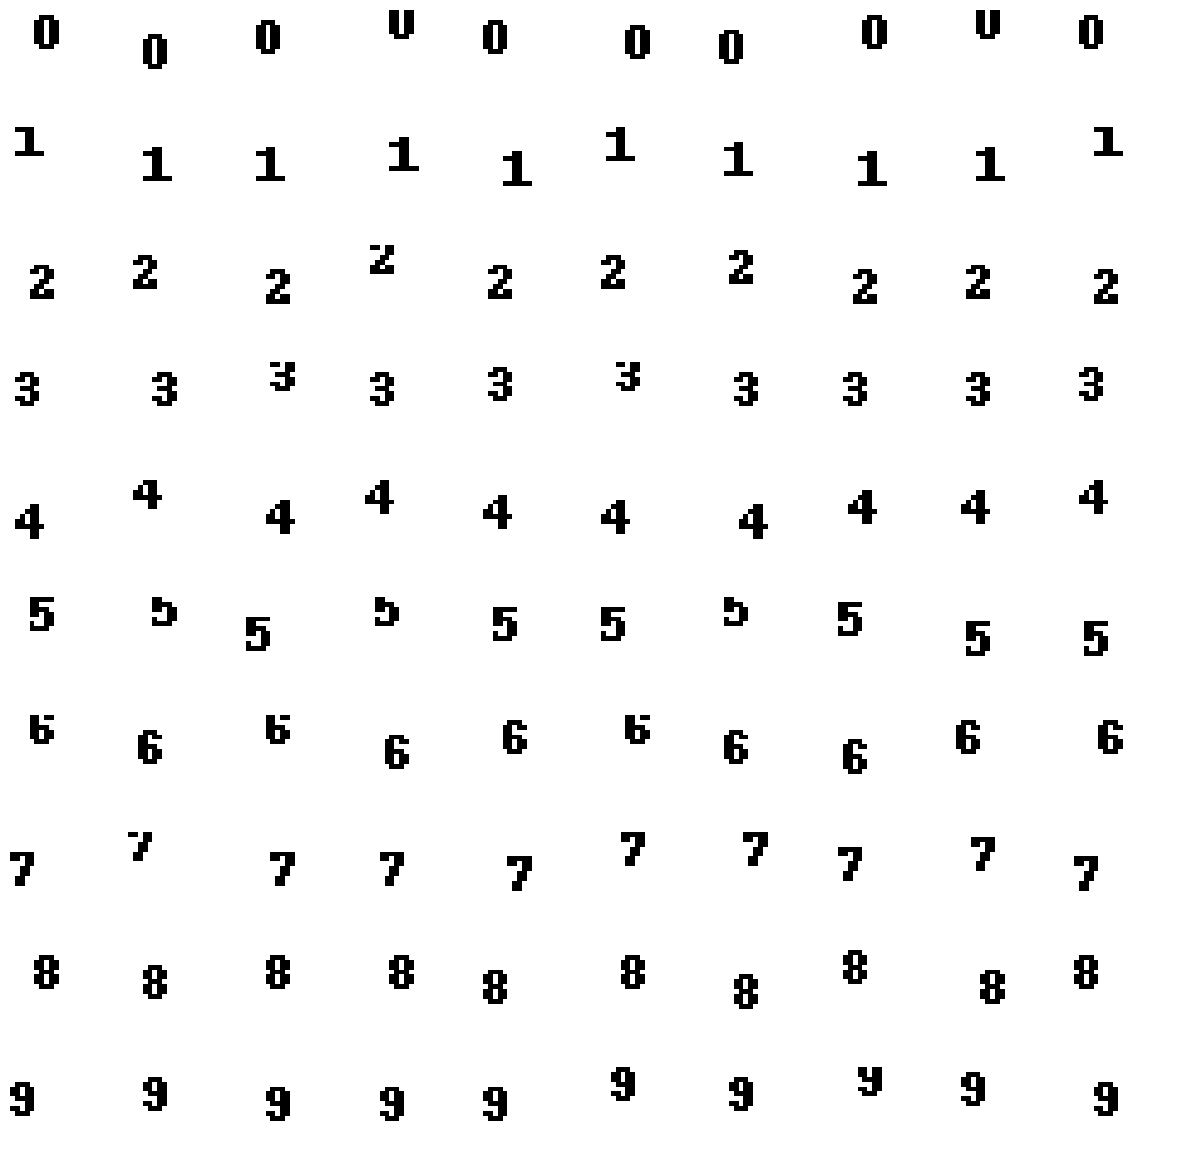

In [6]:
# Generate a set of test images
num_test_images = 50
test_handwritten_digits = [create_test_handwritten_digit() for _ in range(num_test_images)]

# For demonstration purposes, display some of the created training images
plt.figure(figsize=(15, 15))
for digit in handwritten_digits:
    for i in range(10):
        plt.subplot(10, 10, digit * 10 + i + 1)
        plt.imshow(handwritten_digits[digit][i], cmap='gray')
        plt.axis('off')
plt.show()

In [7]:
#Import libraries
import numpy as np

In [8]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.random.randn(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation
        return self.sigmoid(np.dot(x, self.weights[1:]) + self.weights[0])

    def backpropagate(self, x, y, output):
        # Calculate error
        error = y - output

        # Backward propagation
        d_weights = self.learning_rate * np.dot(x.T, error * self.sigmoid_derivative(output))
        d_bias = self.learning_rate * np.sum(error * self.sigmoid_derivative(output))

        # Update weights and bias
        self.weights[1:] += d_weights
        self.weights[0] += d_bias

        return error

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                output = self.forward(X[i])
                error = self.backpropagate(X[i], y[i], output)
            self.loss.append(np.mean(np.square(error)))

    def predict(self, X):
        return [1 if o > 0.5 else 0 for o in self.forward(X)]

In [9]:
# Example of using the Perceptron
input_size = 400  # 20x20 image flattened
perceptron = Perceptron(input_size)

# Training data preparation (flatten the images and prepare labels)
# Convert the images to numpy arrays and flatten them
X_train = np.array([np.array(img).flatten() for digit in handwritten_digits for img in handwritten_digits[digit]])
y_train = np.array([digit for digit in handwritten_digits for _ in handwritten_digits[digit]])

In [10]:
# Train the Perceptron
perceptron.train(X_train, y_train)

# Test data preparation
X_test = np.array([np.array(img).flatten() for img in test_handwritten_digits])

# Predictions
predictions = perceptron.predict(X_test)

# Display predictions
print("Predictions:", predictions)

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
